<a href="https://colab.research.google.com/github/Ristoll/AIS_Labs/blob/main/LR_8_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Коефіцієнти поліноміальної регресії:
intercept = -0.022
coef = [ 0.94   0.034 -0.109 -0.003  0.   ]

Якість моделі:
Mean squared error = 0.077
R2 score = 0.881


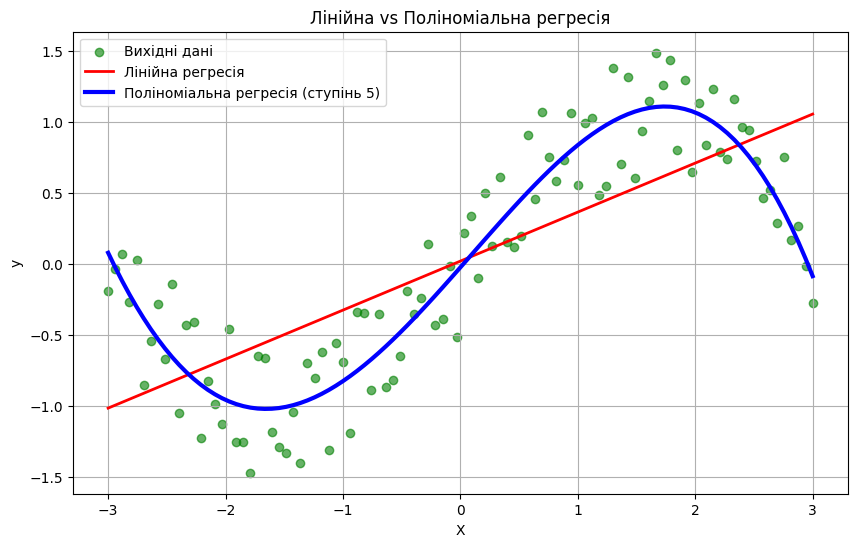

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# --- Вихідні дані ---
m = 100
X = np.linspace(-3, 3, m)
y = np.sin(X) + np.random.uniform(-0.5, 0.5, m)

# Перетворюємо X у формат 2D для sklearn
X = X.reshape(-1, 1)

# --- Лінійна регресія ---
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_linear = lin_reg.predict(X)

# --- Поліноміальна регресія ---
degree = 5  # можна спробувати 4, 5, 6 — чим більше, тим краще підлаштовується до синуса
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

# --- Вивід коефіцієнтів ---
print("Коефіцієнти поліноміальної регресії:")
print("intercept =", round(poly_reg.intercept_, 3))
print("coef =", np.round(poly_reg.coef_, 3))
print("\nЯкість моделі:")
print("Mean squared error =", round(mean_squared_error(y, y_pred_poly), 3))
print("R2 score =", round(r2_score(y, y_pred_poly), 3))

# --- Побудова графіків ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', label='Вихідні дані', alpha=0.6)
plt.plot(X, y_pred_linear, color='red', linewidth=2, label='Лінійна регресія')
plt.plot(X, y_pred_poly, color='blue', linewidth=3, label=f'Поліноміальна регресія (ступінь {degree})')
plt.title("Лінійна vs Поліноміальна регресія")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
